In [59]:
import nptsne
from nptsne import hsne_analysis
from pathlib import Path
import numpy as np
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
from matplotlib.lines import Line2D
import pandas as pd
from tqdm import tqdm
from sklearn.utils import check_random_state, check_array
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


fashionTrain = pd.read_csv('data/fashion-train.csv')

fashionX = fashionTrain.values[:,2:]
fashionY = fashionTrain.values[:, 1].astype(int)

print(fashionX.shape, fashionY.shape)

X = fashionX
X = normalize(X)
lab = fashionY.astype(int)




# X = np.load('./data/MNIST_70000.npy')
# lab = np.load('./data/MNIST_70000_label.npy').astype(int)
# X = normalize(X)


# data = pd.read_csv('data/mnist_max_pooling2d_dense.data', header=None)
# data = data.drop(columns=[0])
# X = data.values[:, :-1]
# lab = data.values[:, -1]


# X = np.loadtxt("data/mammals-20000_features.txt")
# lab = np.loadtxt("data/mammals-20000_classes.txt")



data = pd.read_csv('data/gene_expression.csv')
X = data.values[:, :-1]
lab = data.values[:, -1]
X = np.log(X+1)
# X = normalize(X)
X = PCA(n_components=100).fit_transform(X)






X = check_array(X, dtype=np.float32, accept_sparse="csr", order="C")

X_noised = X + np.random.normal(loc=0, scale=1, size=X.shape)*0.04


dataset = 'fashion'
print('Size data:', X.shape)

(60000, 784) (60000,)
Size data: (3401, 100)


In [60]:
hsne = nptsne.HSne(True)
# Create a 3 scale HSNE analysis from the MNIST data
hsne.create_hsne(X_noised, 2)
print(hsne.get_scale(0).num_points, hsne.get_scale(1).num_points)
# print(hsne.get_scale(0).num_points, hsne.get_scale(1).num_points, hsne.get_scale(2).num_points)
# print(hsne.get_scale(0).num_points, hsne.get_scale(1).num_points, hsne.get_scale(2).num_points, hsne.get_scale(3).num_points)



3401 649


In [61]:
container = hsne_analysis.AnalysisModel(hsne, hsne_analysis.EmbedderType.GPU)

In [62]:
analysis_level3 = container.top_analysis
len(analysis_level3.landmark_orig_indexes)

649

In [63]:
for i in tqdm(range(500)):
    analysis_level3.do_iteration()

100%|██████████| 500/500 [00:00<00:00, 1296.25it/s]


In [64]:
y_analysis_level3 = lab[analysis_level3.landmark_orig_indexes]

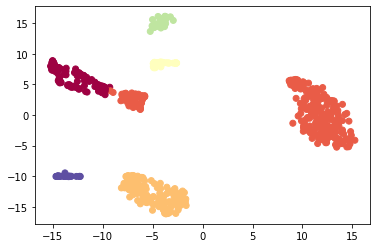

In [65]:
plt.scatter(analysis_level3.embedding[:, 0], analysis_level3.embedding[:, 1], 
            c = y_analysis_level3, cmap='Spectral')
plt.savefig('figs/'+dataset+'-hsne-level3.png')

In [66]:
analysis_level2 = container.add_new_analysis(analysis_level3, np.arange(len(y_analysis_level3)))
len(analysis_level2.landmark_orig_indexes)

3401

In [67]:
for i in tqdm(range(500)):
    analysis_level2.do_iteration()

100%|██████████| 500/500 [00:00<00:00, 883.68it/s]


In [68]:
y_analysis_level2 = lab[analysis_level2.landmark_orig_indexes]
len(y_analysis_level2)

3401

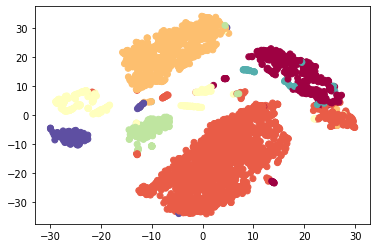

In [69]:
plt.scatter(analysis_level2.embedding[:, 0], analysis_level2.embedding[:, 1], 
            c = y_analysis_level2, cmap='Spectral')
plt.savefig('figs/'+dataset+'-hsne-level2.png')
# inds = y_analysis_level2 == 2
# plt.scatter(analysis_level2.embedding[inds, 0], analysis_level2.embedding[inds, 1], 
#             c = 'black', s=10)
# plt.savefig("hsne_level2.svg")
# plt.show()

In [41]:
analysis_level1 = container.add_new_analysis(analysis_level2, np.arange(len(y_analysis_level2)))
len(analysis_level1.landmark_orig_indexes)

20000

In [42]:
for i in tqdm(range(500)):
    analysis_level1.do_iteration()

100%|██████████| 500/500 [00:01<00:00, 304.17it/s]


In [43]:
y_analysis_level1 = lab[analysis_level1.landmark_orig_indexes]
len(y_analysis_level1)

20000

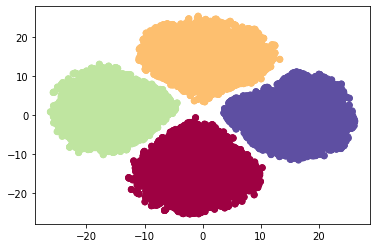

In [44]:
plt.scatter(analysis_level1.embedding[:, 0], analysis_level1.embedding[:, 1], 
            c = y_analysis_level1, cmap='Spectral')
plt.savefig("figs/"+dataset+"-hsne-level1.png")

In [64]:
analysis_level0 = container.add_new_analysis(analysis_level1, np.arange(len(y_analysis_level1)))
len(analysis_level0.landmark_orig_indexes)

0

In [ ]:
for i in tqdm(range(500)):
    analysis_level0.do_iteration()

In [ ]:
y_analysis_level0 = lab[analysis_level0.landmark_orig_indexes]
y_analysis_level0

In [ ]:
plt.scatter(analysis_level0.embedding[:, 0], analysis_level0.embedding[:, 1], c = y_analysis_level0, 
            cmap='Spectral')
plt.savefig("figs/"+dataset+"-hsne-level0.png")
# plt.savefig("hsne_level0.svg")
# plt.show()

In [70]:
indices = []
for i in range(len(y_analysis_level3)):
    if y_analysis_level3[i] in [2]:
        indices.append(i)


analysis_cluster1 = container.add_new_analysis(analysis_level3, np.array(indices))
# len(analysis_cluster.landmark_orig_indexes), analysis_cluster.landmark_orig_indexes

In [71]:
for i in tqdm(range(500)):
    analysis_cluster1.do_iteration()

100%|██████████| 500/500 [00:00<00:00, 1103.73it/s]


In [72]:
y_analysis_cluster1 = lab[analysis_cluster1.landmark_orig_indexes]
len(y_analysis_cluster1)

728

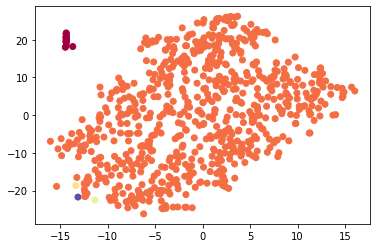

In [73]:
plt.scatter(analysis_cluster1.embedding[:, 0], analysis_cluster1.embedding[:, 1],
            c = y_analysis_cluster1, cmap='Spectral')
plt.savefig("figs/"+dataset+"-hsne-expand1.png")

In [49]:
# indices = []
# for i in range(len(y_analysis_level2)):
#     if y_analysis_level2[i] in [5,7,9]:
#         indices.append(i)


analysis_cluster = container.add_new_analysis(analysis_cluster1, np.arange(len(y_analysis_cluster1)))
# len(analysis_cluster.landmark_orig_indexes), analysis_cluster.landmark_orig_indexes

In [50]:
for i in tqdm(range(500)):
    analysis_cluster.do_iteration()

100%|██████████| 500/500 [00:00<00:00, 730.44it/s]


In [51]:
y_analysis_cluster = lab[analysis_cluster.landmark_orig_indexes]
len(y_analysis_cluster)

10002

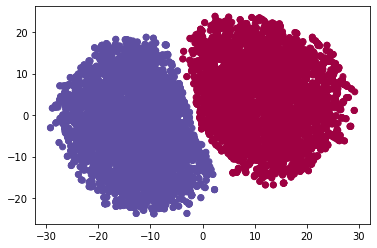

In [52]:
plt.scatter(analysis_cluster.embedding[:, 0], analysis_cluster.embedding[:, 1],
            c = y_analysis_cluster, cmap='Spectral')
plt.savefig("figs/"+dataset+"-hsne-expand2.png")

In [41]:
# indices = []
# for i in range(len(y_analysis_level1)):
#     if y_analysis_level1[i] in [5,7,9]:
#         indices.append(i)


analysis_cluster0 = container.add_new_analysis(analysis_cluster, np.arange(len(y_analysis_cluster)))#np.array(indices))


In [42]:
for i in tqdm(range(500)):
    analysis_cluster0.do_iteration()

100%|██████████| 500/500 [00:00<00:00, 2029.09it/s]


In [43]:
y_analysis_cluster0 = lab[analysis_cluster0.landmark_orig_indexes]

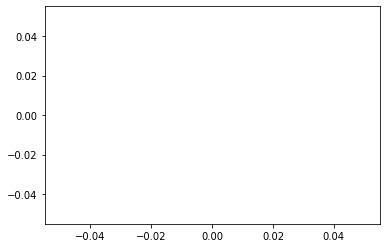

In [44]:
plt.scatter(analysis_cluster0.embedding[:, 0], analysis_cluster0.embedding[:, 1], 
            c = y_analysis_cluster0, cmap='Spectral')
plt.savefig("figs/"+dataset+"-hsne-expand3.png")

In [53]:
import demap
import random
import math
from sklearn.metrics import euclidean_distances

from sklearn.neighbors import NearestNeighbors

from scipy.stats import pearsonr

def correlation(X, X_emb):
    
    high = []
    emb = []
    
    for i in range(X.shape[0]):
        for j in range(i+1, X.shape[0]):
            high.append(np.linalg.norm(X[i]-X[j]))
            emb.append(np.linalg.norm(X_emb[i]-X_emb[j]))
    
    high = np.array(high)
    emb = np.array(emb)
    
    return pearsonr(high, emb)[0]

def stress(X, X_emb):
    
#     num = 0.0
#     den = 0.0
    
#     for i in range(X.shape[0]):
#         for j in range(X.shape[0]):
#             num += (np.linalg.norm(X[i]-X[j]) - np.linalg.norm(X_emb[i]-X_emb[j]))**2
            
#             den += np.linalg.norm(X_emb[i]-X_emb[j])**2
            
#     return math.sqrt(num/den)
    
    
    
    DE = euclidean_distances(X_emb)
    DE = DE/np.max(DE)
    DH = euclidean_distances(X)
    DH = DH/np.max(DH)
    stress = 0.5 * np.sum((DE - DH)**2)
    
    return np.sqrt(stress/(0.5*np.sum(DH**2)))
    

    

def NNP(X, X_emb, Khigh=30):
    neigh_high = NearestNeighbors(n_neighbors=Khigh, n_jobs=-1)
    neigh_high.fit(X)
    high_dists, high_indices = neigh_high.kneighbors(X)


    neigh_emb = NearestNeighbors(n_neighbors=Khigh, n_jobs=-1)
    neigh_emb.fit(X_emb)
    emb_dists, emb_indices = neigh_emb.kneighbors(X_emb)

    m_precision = np.zeros(Khigh)
    m_recall = np.zeros(Khigh)
    
    for i in tqdm(range(X.shape[0])):
        high_current = high_indices[i][1:]
        for k in range(1, Khigh+1):
            emb_current = emb_indices[i][1:k+1]            
            
            tp = len(np.intersect1d(high_current, emb_current))
            
            precision_val = float(tp)/k
            recall_val = float(tp)/Khigh
            
            m_precision[k-1] += precision_val
            m_recall[k-1] += recall_val
    
    m_precision = m_precision/float(X.shape[0])
    m_recall = m_recall/float(X.shape[0])
    
            
    return m_precision, m_recall


def neighborhood_preservation(X, X_emb, Khigh=30):
    
    neigh_high = NearestNeighbors(n_neighbors=Khigh+1, n_jobs=-1)
    neigh_high.fit(X)
    high_dists, high_indices = neigh_high.kneighbors(X)


    neigh_emb = NearestNeighbors(n_neighbors=Khigh+1, n_jobs=-1)
    neigh_emb.fit(X_emb)
    emb_dists, emb_indices = neigh_emb.kneighbors(X_emb)

    npres = np.zeros(Khigh)
    
    for k in range(1, Khigh+1):
        for i in range(X.shape[0]):
            high_current = high_indices[i][1:k+1]
            emb_current = emb_indices[i][1:k+1]
            
            tp = len(np.intersect1d(high_current, emb_current))
            
            npres[k-1] += (tp/k)
        
        
    npres /= float(X.shape[0])
    
    return npres
    
    


stress:  0.5211607644804469
demap:  0.7751458192930287
pearsonr:  0.6610273446298445
[0.16949153 0.24961479 0.31330252 0.35015408 0.39414484 0.4229584
 0.45850759 0.48979199 0.51823318 0.53682589 0.55820143 0.57485876
 0.58847932 0.6009245  0.61222393 0.6249037  0.63563854 0.64774867
 0.65793529 0.66787365 0.6752513  0.68426951 0.69370939 0.69973035
 0.70613251 0.71216072 0.72099526 0.72446621 0.7287073  0.73343606]


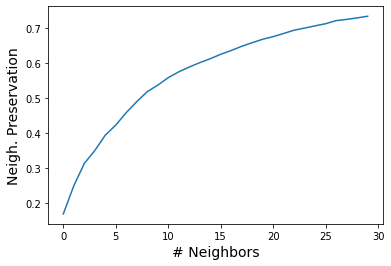

In [74]:
fourth_level = X[analysis_level3.landmark_orig_indexes,:]
fourth_embedding = analysis_level3.embedding

indices_4 = random.sample(range(0, len(fourth_embedding)), min(3000, len(fourth_embedding)))

fourth_embedding = fourth_embedding[indices_4]
fourth_level = fourth_level[indices_4]



noise = np.random.normal(0, .1, fourth_level.shape)
print("stress: ", stress(fourth_level, fourth_embedding))
print("demap: ", demap.DEMaP(fourth_level, fourth_embedding))
print("pearsonr: ", correlation(fourth_level, fourth_embedding))


ks = 30

npres = neighborhood_preservation(fourth_level, fourth_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-level3-np.png")
plt.show()

stress:  0.5635656463863105
demap:  0.6500377381080161
pearsonr:  0.5766545023259112
[0.24566667 0.3115     0.34688889 0.36591667 0.38026667 0.39044444
 0.4012381  0.4085     0.41533333 0.4184     0.42475758 0.43083333
 0.43423077 0.43952381 0.44448889 0.44770833 0.45182353 0.45622222
 0.45924561 0.46198333 0.46498413 0.46859091 0.47217391 0.47480556
 0.47724    0.4800641  0.48217284 0.48452381 0.48670115 0.4888    ]


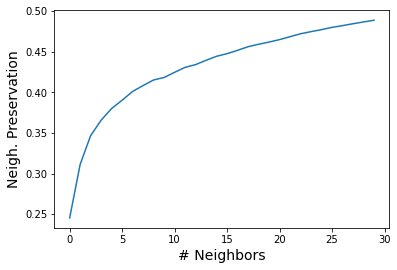

In [75]:

third_level = X[analysis_level2.landmark_orig_indexes,:]
third_embedding = analysis_level2.embedding

indices_3 = random.sample(range(0, len(third_embedding)), min(3000, len(third_embedding)))

third_embedding = third_embedding[indices_3]
third_level = third_level[indices_3]


noise = np.random.normal(0, .1, third_level.shape)
print("stress: ", stress(third_level, third_embedding))
print("demap: ", demap.DEMaP(third_level, third_embedding))
print("pearsonr: ", correlation(third_level, third_embedding))


ks = 30

npres = neighborhood_preservation(third_level, third_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-level2-np.png")
plt.show()

stress:  0.5894648642404733
demap:  0.6976875099935644
pearsonr:  0.32077007742854813
[0.18766667 0.20566667 0.22322222 0.22583333 0.23026667 0.23444444
 0.23633333 0.23808333 0.24037037 0.2411     0.24139394 0.24327778
 0.24551282 0.24838095 0.2502     0.25285417 0.25423529 0.25631481
 0.25882456 0.25948333 0.26180952 0.26381818 0.26608696 0.26843056
 0.27024    0.27164103 0.27353086 0.2757619  0.27727586 0.27874444]


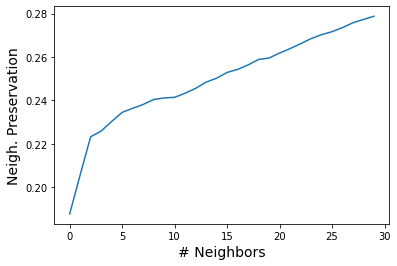

In [56]:

second_level = X[analysis_level1.landmark_orig_indexes,:]
second_embedding = analysis_level1.embedding


indices_2 = random.sample(range(0, len(second_embedding)), min(3000, len(second_embedding)))

second_embedding = second_embedding[indices_2]
second_level = second_level[indices_2]


print("stress: ", stress(second_level, second_embedding))
print("demap: ", demap.DEMaP(second_level, second_embedding))
print("pearsonr: ", correlation(second_level, second_embedding))


npres = neighborhood_preservation(second_level, second_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-level1-np.png")
plt.show()

In [28]:

first_level = X[analysis_level0.landmark_orig_indexes,:]
first_embedding = analysis_level0.embedding


indices_1 = random.sample(range(0, len(first_embedding)), min(3000, len(first_embedding)))

first_embedding = first_embedding[indices_1]
first_level = first_level[indices_1]

print("stress: ", stress(first_level, first_embedding))
print("demap: ", demap.DEMaP(first_level, first_embedding))
print("pearsonr: ", correlation(first_level, first_embedding))

npres = neighborhood_preservation(first_level, first_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-level0-np.png")
plt.show()

NameError: name 'analysis_level0' is not defined

stress:  0.8146421572645712
demap:  0.7782124941716224
pearsonr:  0.7209864227402718
[0.37087912 0.40590659 0.40705128 0.41449176 0.42967033 0.43246337
 0.43308477 0.43406593 0.43467643 0.43818681 0.44005994 0.44242216
 0.44463229 0.44515306 0.44835165 0.45166552 0.45151907 0.4514652
 0.45322441 0.45583791 0.4563056  0.45891608 0.46297181 0.46531593
 0.46697802 0.47051986 0.4739011  0.47537284 0.47555892 0.47843407]


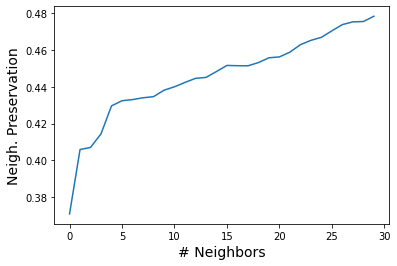

In [76]:
cluster_level = X[analysis_cluster1.landmark_orig_indexes,:]
cluster_embedding = analysis_cluster1.embedding

indices_cluster = random.sample(range(0, len(cluster_embedding)), min(5000, len(cluster_embedding)))

cluster_embedding = cluster_embedding[indices_cluster]
cluster_level = cluster_level[indices_cluster]

print("stress: ", stress(cluster_level, cluster_embedding))
print("demap: ", demap.DEMaP(cluster_level, cluster_embedding))
print("pearsonr: ", correlation(cluster_level, cluster_embedding))

ks = 30

npres = neighborhood_preservation(cluster_level, cluster_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-expand1-np.png")
plt.show()

stress:  0.3654325029624976
demap:  0.6899698688558193
pearsonr:  0.6862751917335831
[0.3182     0.3196     0.31873333 0.32015    0.31216    0.30456667
 0.29665714 0.293825   0.28851111 0.28284    0.27770909 0.27306667
 0.26936923 0.26621429 0.26338667 0.2605375  0.25804706 0.25544444
 0.25331579 0.25158    0.2506     0.24968182 0.2486087  0.24753333
 0.246112   0.24470769 0.24394815 0.24288571 0.24248966 0.24153333]


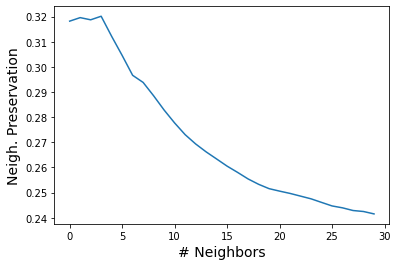

In [58]:
cluster_level = X[analysis_cluster.landmark_orig_indexes,:]
cluster_embedding = analysis_cluster.embedding

indices_cluster = random.sample(range(0, len(cluster_embedding)), min(5000, len(cluster_embedding)))

cluster_embedding = cluster_embedding[indices_cluster]
cluster_level = cluster_level[indices_cluster]

print("stress: ", stress(cluster_level, cluster_embedding))
print("demap: ", demap.DEMaP(cluster_level, cluster_embedding))
print("pearsonr: ", correlation(cluster_level, cluster_embedding))

ks = 30

npres = neighborhood_preservation(cluster_level, cluster_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-expand2-np.png")
plt.show()

In [47]:
cluster_level = X[analysis_cluster0.landmark_orig_indexes,:]
cluster_embedding = analysis_cluster0.embedding

indices_cluster = random.sample(range(0, len(cluster_embedding)), min(5000, len(cluster_embedding)))

cluster_embedding = cluster_embedding[indices_cluster]
cluster_level = cluster_level[indices_cluster]

print("stress: ", stress(cluster_level, cluster_embedding))
print("demap: ", demap.DEMaP(cluster_level, cluster_embedding))
print("pearsonr: ", correlation(cluster_level, cluster_embedding))

ks = 30

npres = neighborhood_preservation(cluster_level, cluster_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-expand3-np.png")
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by check_pairwise_arrays.